In [11]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [8]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 11s 10ms/step - loss: 0.2308 - accuracy: 0.9299 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0790 - accuracy: 0.9765 - val_loss: 0.0376 - val_accuracy: 0.9869
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.0318 - val_accuracy: 0.9891
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0485 - accuracy: 0.9851 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0421 - accuracy: 0.9871 - val_loss: 0.0304 - val_accuracy: 0.9905
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0295 - val_accuracy: 0.9908
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0271 - val_accuracy: 0.9911
Epo

In [9]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.026582373306155205
Test accuracy: 0.9922999739646912


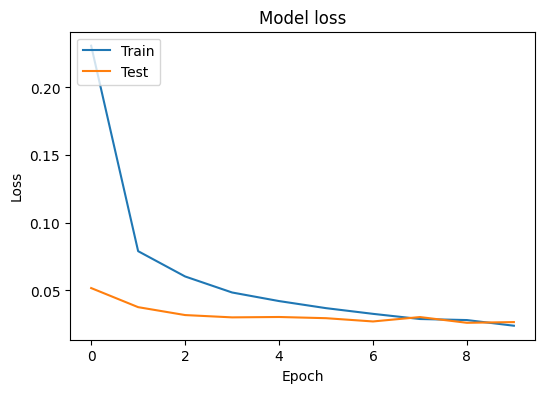

In [12]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()